- https://www.alvinang.sg/s/sleep.csv
- https://www.alvinang.sg/s/chickwts.csv
- https://www.alvinang.sg/s/college.csv



---



#Hypothesis Testing for Sleep.csv
- Do the 2 groups of people have the same amount of sleep?

##Step 1: Import the Sleep Dataset

In [ ]:
import statsmodels.api as sm
sleep = sm.datasets.get_rdataset("sleep").data

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#preview the dataset
sleep

,extra,group,ID
0,0.7,1,1
1,-1.6,1,2
2,-0.2,1,3
3,-1.2,1,4
4,-0.1,1,5
5,3.4,1,6
6,3.7,1,7
7,0.8,1,8
8,0.0,1,9
9,2.0,1,10


##Step 2: Box Plot for the 2 Groups

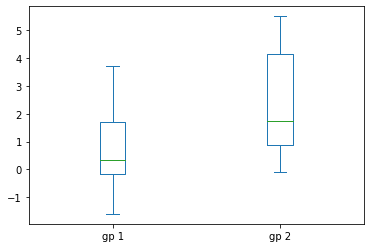

In [ ]:
import pandas as pd

gp1 = sleep[sleep.group==1].extra
gp2 = sleep[sleep.group==2].extra

c = pd.DataFrame({'gp 1': gp1.values, 'gp 2': gp2.values})

c.plot(kind = 'box')

#at first glance, both box plots look the same
#i.e. no significant difference between both groups 
#because they overlap each other but we can't be sure
#so we need to do hypothesis testing to confirm this

##Step 3: Individual t test Between Both Groups

In [ ]:
import scipy

result = scipy.stats.ttest_ind(gp1, gp2)
result.pvalue

#the p-value = 0.079 > alpha (0.05)
#Thus we ACCEPT H0 --> Both Groups have NO Significant Difference 
#they are the SAME

0.07918671421593818

##Step 4: Alternative Way of Running t Test

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

def t_test(x, y, alternative = 'both-sided'):
           _, double_p = ttest_ind(x, y, equal_var = False)
           if alternative == 'both-sided':
             pval = double_p
           elif alternative == 'greater':
             if np.mean(x) > np.mean(y):
               pval = double_p/2.
             else:
                 pval = 1.0 - double_p/2.
           elif alternative == 'less':
             if np.mean(x) < np.mean(y):
               pval = double_p/2.
             else:
                 pval = 1.0 - double_p/2.
           return pval

print(t_test(gp1, gp2, alternative = 'both-sided'))

#For 2 sided test, we see that it gives the same p value of 0.079

#though for this case the result is the same as Step 3, 
#we may make use of the above script to test for 'greater' or 'less' 
#than hypothesis tests should there be a difference in the means.

0.0793941401873582




---



#Hypothesis Testing for Chickwts.csv
- Comparing the feeds Horsebean vs Casein, is there a significant difference in the weights of the chicken?

- If there is, which one has more? 
- I.e. will Horsebean or Casein make the Chicken fatter?

##Step 1: Import Chickwts.csv

In [ ]:
import statsmodels.api as sm
import scipy

chickwts = sm.datasets.get_rdataset("chickwts").data

In [ ]:
#preview the dataset
chickwts

,weight,feed
0,179,horsebean
1,160,horsebean
2,136,horsebean
3,227,horsebean
4,217,horsebean
...,...,...
66,359,casein
67,216,casein
68,222,casein
69,283,casein


##Step 2: Extract Only the Weights Column for Horsebean and Casein

In [ ]:
#reading in the weights for the 2 type of feed
horsebean = chickwts[chickwts.feed == 'horsebean'].weight
casein = chickwts[chickwts.feed=='casein'].weight

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


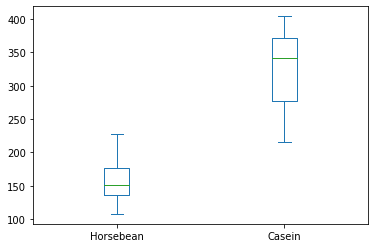

In [ ]:
import pandas as pd

c = pd.DataFrame({'Horsebean': horsebean, 'Casein': casein})

c.plot(kind = 'box')

#at first glance, both box plots look DIFFERENT
#i.e. SIGNIFICANT difference between both groups 
#because they DON'T overlap each other but we can't be sure
#so we need to do hypothesis testing to confirm this

##Step 3: Perform a 2 tail t - test
- H0: Horsebean == Casein
- H1: Horsebean != Casein

In [ ]:
#t test 2 tail
result = scipy.stats.ttest_ind(horsebean, casein)
result.pvalue

#P - value = 0.0000... which means we accept H1
#Meaning, there is a SIGNIFICANT difference 
#between 'horsebean' vs ' casein' feeds.
#But which is more? Which is lesser? 

8.254541016953191e-07

##Step 4: Perform a 1 tail t - test

###4a) Claim that Horsebean > Casein
- H0: mean of horsebean >= mean of casein
- H1: mean of horsebean < mean of casein

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

def t_test(x, y, alternative = 'both-sided'):
           _, double_p = ttest_ind(x, y, equal_var = False)
           if alternative == 'both-sided':
             pval = double_p
           elif alternative == 'greater':
             if np.mean(x) > np.mean(y):
               pval = double_p/2.
             else:
                 pval = 1.0 - double_p/2.
           elif alternative == 'less':
             if np.mean(x) < np.mean(y):
               pval = double_p/2.
             else:
                 pval = 1.0 - double_p/2.
           return pval

print(t_test(horsebean, casein, alternative = 'less'))

#The test here is:
# - H0: mean of horsebean >= mean of casein
# - H1: mean of horsebean < mean of casein

#P value is very small << alpha (0.05) --> Accept H1
#Meaning, the mean weight of horsebean is significantly less than casein.

3.60512479059563e-07


###4b) Claim that Horsebean < Casein
- H0: mean of horsebean <= mean of casein
- H1: mean of horsebean > mean of casein

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

def t_test(x, y, alternative = 'both-sided'):
           _, double_p = ttest_ind(x, y, equal_var = False)
           if alternative == 'both-sided':
             pval = double_p
           elif alternative == 'greater':
             if np.mean(x) > np.mean(y):
               pval = double_p/2.
             else:
                 pval = 1.0 - double_p/2.
           elif alternative == 'less':
             if np.mean(x) < np.mean(y):
               pval = double_p/2.
             else:
                 pval = 1.0 - double_p/2.
           return pval

print(t_test(horsebean, casein, alternative = 'greater'))

#The test here is:
# - H0: mean of horsebean <= mean of casein
# - H1: mean of horsebean > mean of casein

#P value is almost 1, very big >> alpha (0.05) --> Accept H0
#Meaning, the mean weight of horsebean is significantly less than casein.

0.9999996394875209




---



#ANOVA for Chickwts.csv

##Step 1: Import Chickwts Dataset

In [2]:
import statsmodels.api as sm
chickwts = sm.datasets.get_rdataset("chickwts").data

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#preview the data

chickwts

,weight,feed
0,179,horsebean
1,160,horsebean
2,136,horsebean
3,227,horsebean
4,217,horsebean
...,...,...
66,359,casein
67,216,casein
68,222,casein
69,283,casein


##Step 2: Boxplot

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


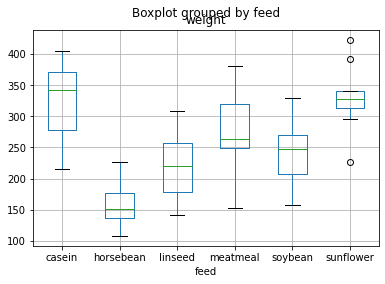

In [4]:
chickwts.boxplot('weight', 'feed')

#observations: 
#most significant difference is between Horsebean vs Casein
#thus the initial claim will be 
#--> There IS A SIGNIFICANT difference in at least two of the feeds 

##Step 3: ANOVA Test

In [6]:
from statsmodels.formula.api import ols

model = ols('weight ~ feed', chickwts).fit()

In [7]:
from statsmodels.stats.api import anova_lm

anova_lm(model)

#H0: Mean Weight for Casein = Horsebean = .....= Sunflower
#H1: Mean Weight for Casein != Horsebean != ..... != Sunflower

#P value = 0.0000... << Alpha (0.05) --> ACCEPT H1
#--> There IS A SIGNIFICANT difference in at least two of the feeds

,df,sum_sq,mean_sq,F,PR(>F)
feed,5.0,231129.162103,46225.832421,15.3648,5.936420e-10
Residual,65.0,195556.020996,3008.554169,NaN,NaN




---



#ANOVA for College.csv - Part I: Is there a Significant Difference in Tuition Numbers between Regions?

##Step 1: Importing College.csv

In [8]:
import pandas as pd

college = pd.read_csv('https://www.alvinang.sg/s/college.csv')

##Step 2: Box Plot

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


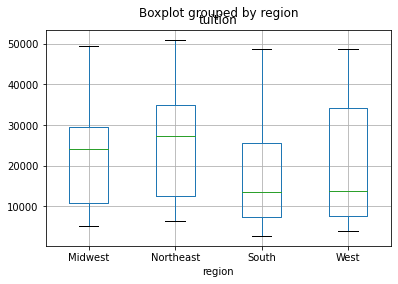

In [9]:
college.boxplot('tuition', 'region')

#there don't seem to be a significant difference between 4 regions...
#Thus we claim NO difference...

##Step 3: ANOVA Test

In [10]:
from statsmodels.formula.api import ols

model = ols('tuition ~ region', college).fit() 

In [11]:
from statsmodels.stats.api import anova_lm

anova_lm(model)

#H0: Tuition Numbers in Midwest = Northeast = South = West
#H1: Tuition Numbers in Midwest != Northeast != South != West

#P value = 0.000.... << Alpha (0.05) --> Accept H1
#There's a SIGNIFICANT difference

#Our initial observation (from box plot) is WRONG!

,df,sum_sq,mean_sq,F,PR(>F)
region,3.0,1.240011e+10,4.133370e+09,27.933294,1.719599e-17
Residual,1265.0,1.871857e+11,1.479729e+08,NaN,NaN


---



#ANOVA for College.csv - Part II: Is there a Significant Difference in Tuition Numbers between Private / Public schools?

##Step 1: Box Plot 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


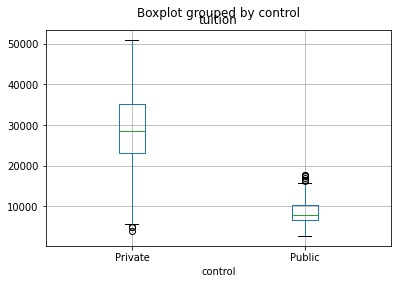

In [12]:
college.boxplot('tuition', 'control')

#box plot looks like there's SIGNIFICANT difference

##Step 2: ANOVA Test

In [13]:
model = ols('tuition ~ control', college).fit()
anova_lm(model)

#H0: Tuition Numbers for Private School = Public School
#H1: Tuition Numbers for Private School != Public School

#P value = 0.000...... <<Alpha (0.05) --> Accept H1
#there is a SIGNIFICANT difference between Private vs Public school

,df,sum_sq,mean_sq,F,PR(>F)
control,1.0,1.262551e+11,1.262551e+11,2181.423086,9.464090e-278
Residual,1267.0,7.333068e+10,5.787741e+07,NaN,NaN




---

#THE END


---

